# Experimenting with NVIDIA StyleGAN

In [2]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

In [3]:
# Initialize TensorFlow.
tflib.init_tf()

In [4]:
# Load pre-trained network.

# UNCOMMENT THIS TO DOWNLOAD
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:

# UNCOMMENT THIS TO JUST RUN
# with open("karras2019stylegan-ffhq-1024x1024.pkl", "rb") as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

# Print network details.
Gs.print_layers()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2  

In [5]:
for i in range(10):
    # Pick latent vector.
    rnd = np.random.RandomState(5)
    latents = rnd.randn(1, Gs.input_shape[1])

    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    i = 0
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, 'example_{0:d}.png'.format(i))
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

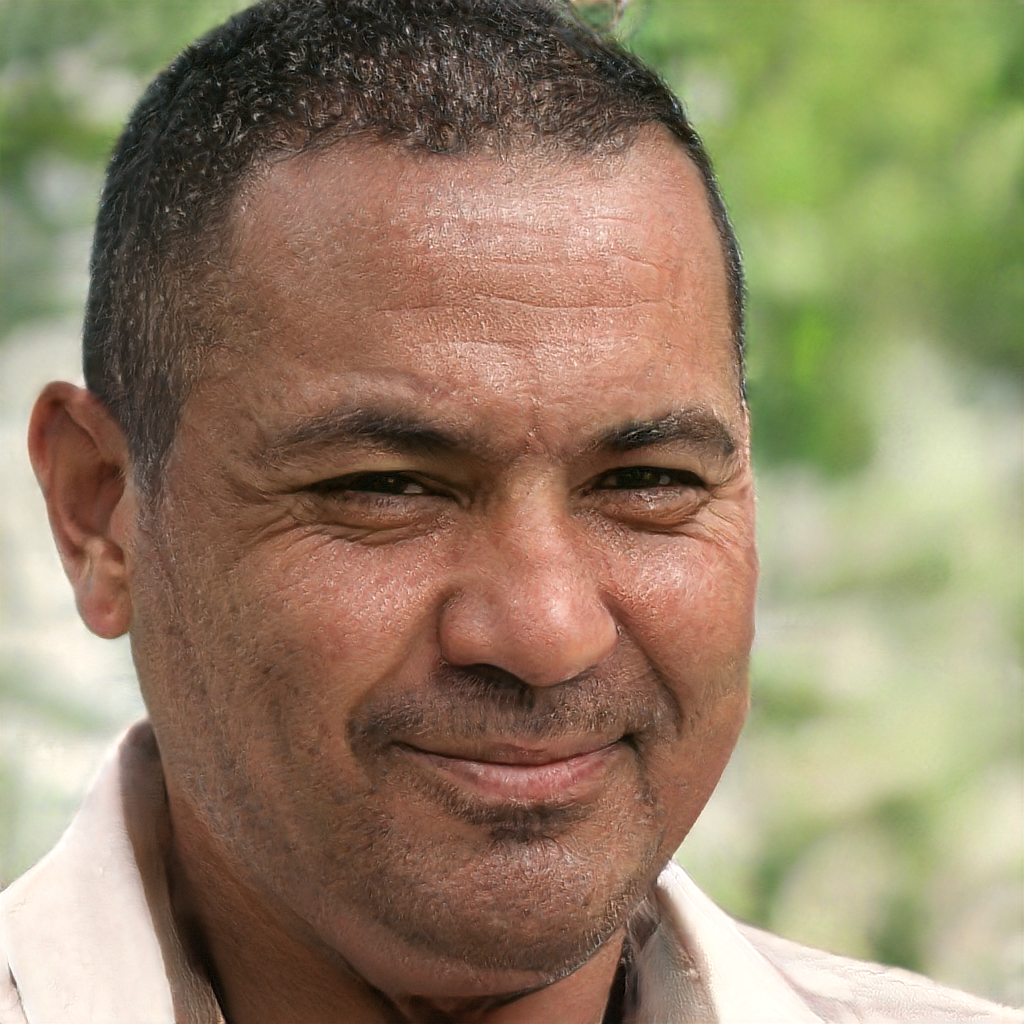

FileNotFoundError: [Errno 2] No such file or directory: 'results/example_1.png'

In [6]:
from IPython.display import display # to display images

for i in range(10):
    image_in = PIL.Image.open(os.path.join(config.result_dir, 'example_{0:d}.png'.format(i)), 'r')
    display(image_in)

## Activities
- Experiment with latent vectors (non-random)
- Interpolation between latent vectors
- ???

## Reference
- This notebook sits on top of the stylegan respository [https://github.com/NVlabs/stylegan](https://github.com/NVlabs/stylegan)